# 💼 Business Performance Dashboard
An end-to-end reporting project that visualizes sales, profit, and customer performance insights using the E-Commerce dataset.  
The goal is to build a simple dashboard-style analysis that helps management monitor key KPIs and identify business opportunities.


### 🎯 Objective
To analyze company performance metrics—sales, orders, and customer segments—and present them through clear, actionable visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

# Load dataset
df = pd.read_csv("/content/train.csv")

# Preview
print("Shape:", df.shape)
df.head(3)


Shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### 📊 Data Overview
The dataset contains details of 9,800 orders including order dates, ship modes, customer segments, product categories, and sales values.


In [3]:
# Clean whitespace just in case
df["order_date"] = df["order_date"].astype(str).str.strip()
df["ship_date"]  = df["ship_date"].astype(str).str.strip()

# Parse mixed formats with day-first handling
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce", format="mixed", dayfirst=True)
df["ship_date"]  = pd.to_datetime(df["ship_date"],  errors="coerce", format="mixed", dayfirst=True)

# Quick sanity check
print("Order_date NaT count:", df["order_date"].isna().sum())
print("Ship_date  NaT count:", df["ship_date"].isna().sum())
print("Date range:", df["order_date"].min(), "→", df["order_date"].max())


Order_date NaT count: 0
Ship_date  NaT count: 0
Date range: 2015-01-03 00:00:00 → 2018-12-30 00:00:00


In [4]:
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month_name()
df["month_num"] = df["order_date"].dt.month


> **KPI Snapshot:**  
> - **Total Sales** — overall revenue generated  
> - **Total Orders** — total unique transactions  
> - **Average Order Value (AOV)** — spending per order  
> - **Top State** — highest-revenue region


In [5]:
total_sales = df["sales"].sum()
avg_order_value = df["sales"].mean()
total_orders = df["order_id"].nunique()
top_state = df.groupby("state")["sales"].sum().idxmax()

print(f"💰 Total Sales: ${total_sales:,.0f}")
print(f"📦 Total Orders: {total_orders}")
print(f"💳 Average Order Value: ${avg_order_value:,.0f}")
print(f"🏆 Top Performing State: {top_state}")


💰 Total Sales: $2,261,537
📦 Total Orders: 4922
💳 Average Order Value: $231
🏆 Top Performing State: California


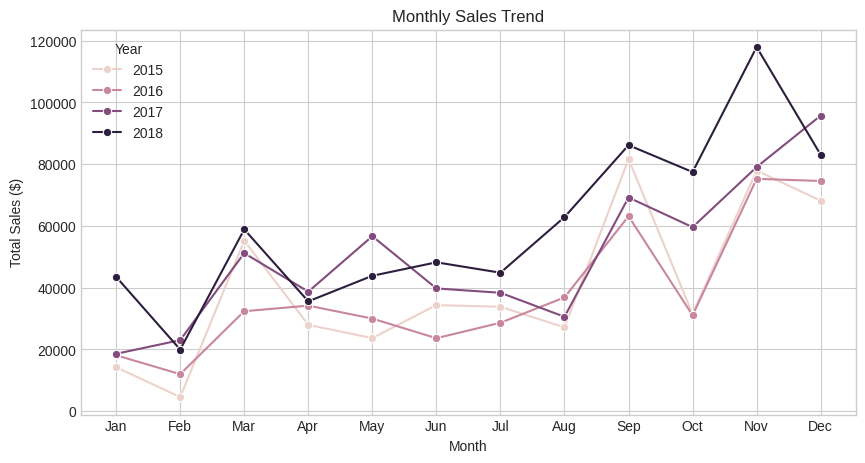

In [6]:
monthly_sales = df.groupby(["year", "month_num"])["sales"].sum().reset_index()
monthly_sales["month"] = monthly_sales["month_num"].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x="month", y="sales", hue="year", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.legend(title="Year")
plt.show()


> 📈 *Sales show steady year-over-year growth with noticeable peaks during year-end months.*


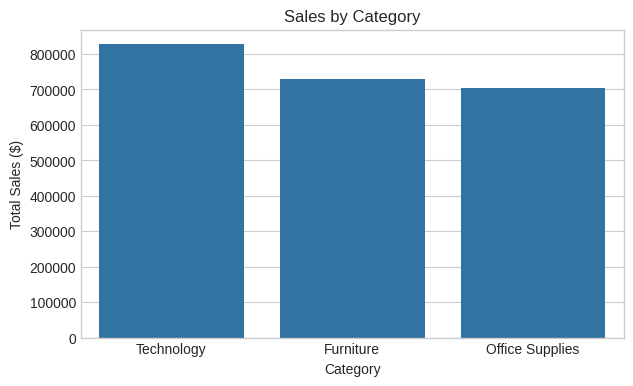

In [7]:
cat_sales = df.groupby("category")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=cat_sales.index, y=cat_sales.values)
plt.title("Sales by Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Category")
plt.show()


> 🛍️ *Technology and Office Supplies drive the highest sales volumes, outperforming Furniture.*


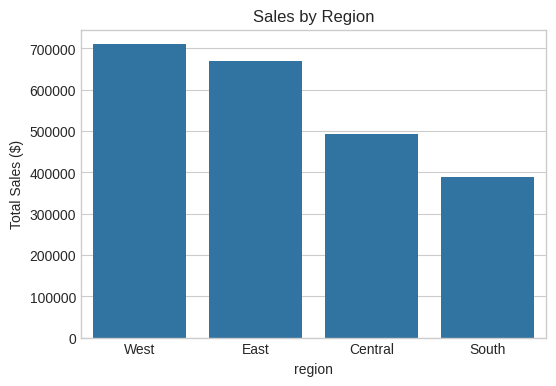

In [8]:
region_sales = df.groupby("region")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.ylabel("Total Sales ($)")
plt.show()


> 🌎 *The West region dominates overall revenue, indicating a strong customer base and delivery efficiency.*


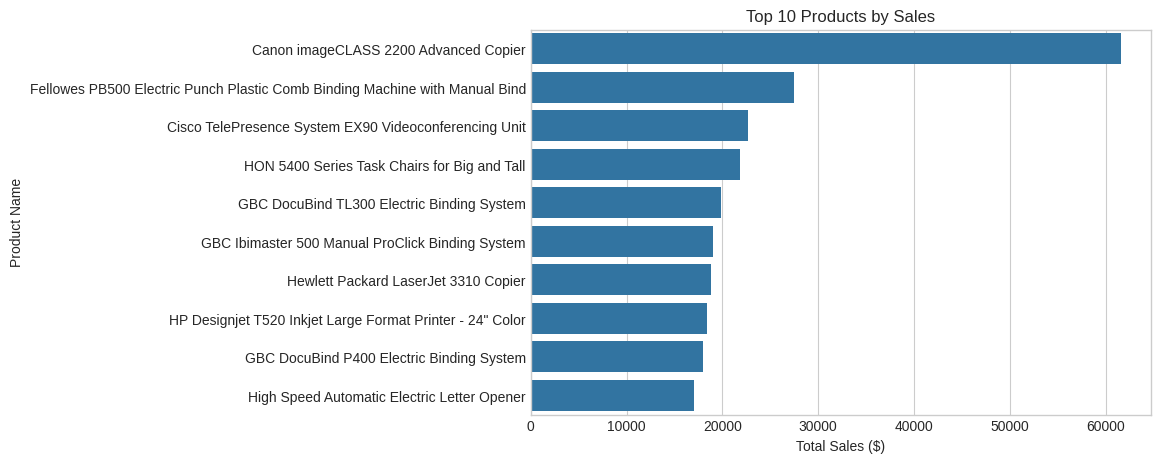

In [9]:
top_products = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()


> 🏆 *A handful of high-value items account for a large share of sales—typical “80/20” distribution.*


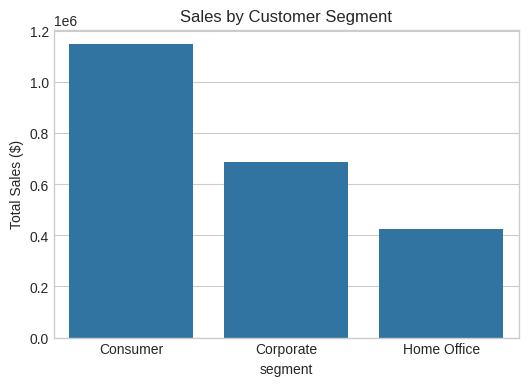

In [10]:
seg_sales = df.groupby("segment")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=seg_sales.index, y=seg_sales.values)
plt.title("Sales by Customer Segment")
plt.ylabel("Total Sales ($)")
plt.show()


> 👥 *Consumer customers form the largest segment, followed by Corporate and Home Office.*


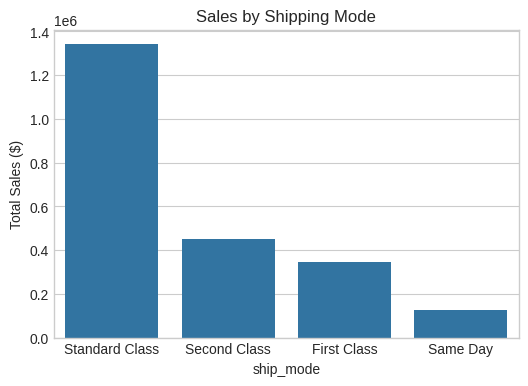

In [11]:
ship_sales = df.groupby("ship_mode")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=ship_sales.index, y=ship_sales.values)
plt.title("Sales by Shipping Mode")
plt.ylabel("Total Sales ($)")
plt.show()


> 🚚 *Standard Class is the most common shipping choice, showing customer preference for cost-effective delivery.*


In [12]:
dashboard_summary = {
    "Total Sales": [round(total_sales, 2)],
    "Average Order Value": [round(avg_order_value, 2)],
    "Total Orders": [total_orders],
    "Top State": [top_state]
}

pd.DataFrame(dashboard_summary).to_csv("/content/business_dashboard_summary.csv", index=False)
print("💾 Saved summary: /content/business_dashboard_summary.csv")


💾 Saved summary: /content/business_dashboard_summary.csv


## 🧾 Summary

This project demonstrates how data analytics can support business performance tracking through end-to-end reporting.  

### ✅ Key Takeaways
- Clear visualization of monthly, regional, and category-wise trends.  
- Simple KPI metrics summarize business health at a glance.  
- Useful reference for developing dashboards in Power BI, Tableau, or Streamlit.

### 🚀 Next Steps
- Add profit and discount KPIs.  
- Build an interactive dashboard interface.  
- Automate monthly updates.
